<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/IA353/EF1p3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


# BASELINE MODEL

In [4]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4276 - accuracy: 0.8713
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1404 - accuracy: 0.9559
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1084 - accuracy: 0.9657
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0878 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0784 - accuracy: 0.9759


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 512)                 401920    
_________________________________________________________________
dropout (Dropout)            (32, 512)                 0         
_________________________________________________________________
dense_1 (Dense)              (32, 10)                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### Test Accuracy:

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9803


[0.06766582280397415, 0.9803000092506409]

#### Plot

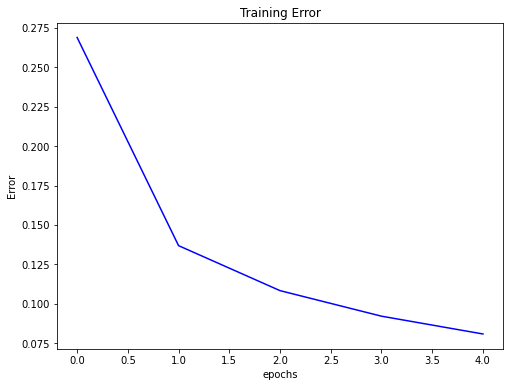

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.title('Training Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.show()

In [8]:
model_json = model.to_json()
json_file = open("model_MLP.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP.h5")
print("Model saved to disk")
os.getcwd()

Model saved to disk


'/content'

### Working with multiples executions:

In [9]:
executions = 5
histories = []
evaluations = []

for i in range(executions):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  print('## Training model number: ', i+1)

  model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
  
  histories.append(model.fit(x_train, y_train, epochs=5, verbose=0))

  print('#• Test set:')
  evaluations.append(model.evaluate(x_test, y_test))
  print('\n')

## Training model number:  1
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.9818


## Training model number:  2
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9791


## Training model number:  3
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9801


## Training model number:  4
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0637 - accuracy: 0.9792


## Training model number:  5
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9777




In [10]:
histories[0].history.keys()

dict_keys(['loss', 'accuracy'])

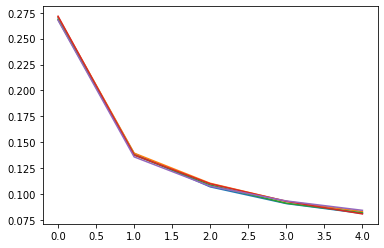

In [11]:
plt.figure(figsize=(8, 6))  
plt.xlabel('epochs')
plt.ylabel('Error')
for i in range(executions):
  plt.plot(histories[i].history['loss'])
plt.show()

In [12]:
histories[-1].history['accuracy'] # Last training acc log per epochs

[0.9208166599273682,
 0.9589333534240723,
 0.9667999744415283,
 0.9713166952133179,
 0.974049985408783]

In [13]:
evaluations[0] # Loss and acc for the first model (LIST)

[0.0607842355966568, 0.9818000197410583]

In [14]:
acc_val = []
acc_test = []

for i in range(executions):
  acc_val.append(sum(histories[i].history['accuracy']) / len(histories[i].history['accuracy']))
  acc_test.append(evaluations[i][1])

acc_val

[0.9581000089645386,
 0.9576733350753784,
 0.9577133417129516,
 0.9579466700553894,
 0.9583833336830139]

In [15]:
acc_test

[0.9818000197410583,
 0.9790999889373779,
 0.9800999760627747,
 0.979200005531311,
 0.9776999950408936]

#### Average validation accuracy (training set)

In [16]:
avg_acc_val = sum(acc_val)/len(acc_val)
avg_acc_val

0.9579633378982544

#### Average test accuracy

In [17]:
avg_acc_test = sum(acc_test)/len(acc_test)
avg_acc_test

0.9795799970626831

# MODIFIED MODEL

• Goal: Better test accuracy results

### Holdout:

In [18]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


One-hot encoding train and test labels:

In [19]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

20% for validation set

80% for training set

In [20]:
from sklearn.model_selection import train_test_split
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=261663)

In [21]:
print('train_data shape:', x_train.shape)
print('train_data_val shape:', train_data_val.shape)
print('train_labels shape:', y_train.shape)
print('train_labels_val shape:', train_labels_val.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


train_data shape: (60000, 28, 28)
train_data_val shape: (12000, 28, 28)
train_labels shape: (60000, 10)
train_labels_val shape: (12000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


In [22]:
train_data = tf.expand_dims(train_data, axis=-1)
train_data_val = tf.expand_dims(train_data_val, axis=-1)

x_test = tf.expand_dims(x_test, axis=-1)

### Model

Inspired by [LeNet-5, 1998](https://ieeexplore.ieee.org/document/726791), the architecture follows the structure: conv->pool->conv->pool->fc->output

Modifications:
• Adam with learning rate 0.001
• Mini-batch size of 64

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [25]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(lr=0.001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [26]:
history = model.fit(train_data, train_labels,
                    batch_size = 64, 
                    epochs = 25, 
                    validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/25
750/750 - 4s - loss: 0.1671 - accuracy: 0.9485 - val_loss: 0.0583 - val_accuracy: 0.9829
Epoch 2/25
750/750 - 2s - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0431 - val_accuracy: 0.9875
Epoch 3/25
750/750 - 2s - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0352 - val_accuracy: 0.9897
Epoch 4/25
750/750 - 2s - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0399 - val_accuracy: 0.9886
Epoch 5/25
750/750 - 2s - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0364 - val_accuracy: 0.9893
Epoch 6/25
750/750 - 2s - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0291 - val_accuracy: 0.9911
Epoch 7/25
750/750 - 2s - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0346 - val_accuracy: 0.9911
Epoch 8/25
750/750 - 2s - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0330 - val_accuracy: 0.9903
Epoch 9/25
750/750 - 2s - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0453 - val_accuracy: 0.9891
Epoch 10/25
750/750 - 2s - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0392 - val_accuracy: 0.9901

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9909


[0.057193949818611145, 0.9908999800682068]

## Plot

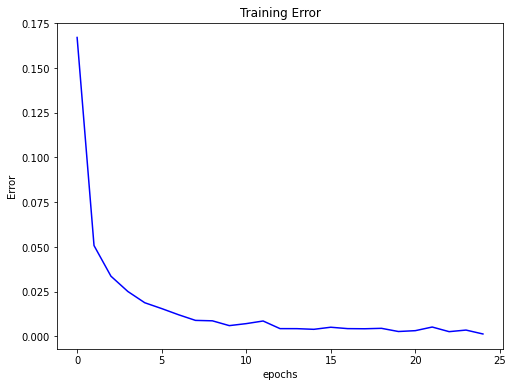

In [28]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.title('Training Error')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.show()

### Working with multiples executions:

In [29]:
executions = 5
histories = []
evaluations = []

for i in range(executions):
  tf.keras.backend.clear_session()
  model = 0
  model = Sequential()
  model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(256, activation = "relu"))
  model.add(Dense(10, activation = "softmax"))
  
  print('## Training model number: ', i+1)

  model.compile(optimizer = Adam(lr=0.001),
                loss = "categorical_crossentropy",
                metrics=['accuracy'])
  
  histories.append(model.fit(train_data, train_labels,
                             batch_size = 64, 
                             epochs = 10, 
                             validation_data = (train_data_val, train_labels_val), verbose = 0))

  print('#• Test set:')
  evaluations.append(model.evaluate(x_test, y_test))
  print('\n')

## Training model number:  1
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9882


## Training model number:  2
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0425 - accuracy: 0.9889


## Training model number:  3
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.9907


## Training model number:  4
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0385 - accuracy: 0.9909


## Training model number:  5
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9912




In [30]:
histories[0].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plot

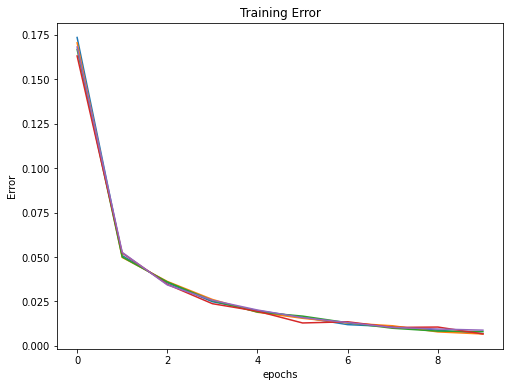

In [31]:
plt.figure(figsize=(8, 6))  
plt.title('Training Error')
plt.xlabel('epochs')
plt.ylabel('Error')

for i in range(executions):
  plt.plot(histories[i].history['loss'])
plt.show()

In [32]:
evaluations[0]

[0.04564037173986435, 0.9882000088691711]

In [33]:
acc_val = []
acc_test = []

for i in range(executions):
  acc_val.append(sum(histories[i].history['val_accuracy']) / len(histories[i].history['val_accuracy']))
  acc_test.append(evaluations[i][1])

acc_val

[0.9885083317756653,
 0.9882833302021027,
 0.9886416614055633,
 0.9887250006198883,
 0.9880333304405212]

In [34]:
acc_test

[0.9882000088691711,
 0.9889000058174133,
 0.9907000064849854,
 0.9908999800682068,
 0.9911999702453613]

#### Average validation accuracy (validation set)

In [35]:
avg_acc_val = sum(acc_val)/len(acc_val)
avg_acc_val

0.9884383308887482

#### Average test accuracy

In [36]:
avg_acc_test = sum(acc_test)/len(acc_test)
avg_acc_test

0.9899799942970275